# Experiments for synthetic systems
Code found in src/synthetic/experiment.py, including experiments parameters
We perform experiments to:
- Validate theory 
- Break the Markov assumption
- Break the stationary assumption when using Stat-LuPTS

In [1]:
# Import packages and classes

import sys 
import os
sys.path.append('..')

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score, mean_squared_error

# Import packages
from src.synthethic.generate import create_default_system
from src.synthethic.experiment import run_experiment, plot_results, default_values, save_folder
from src.plotutils import plot_system

save_figures = True

# Visualizations of synthetic system

## Stable system (spectral radius = 1)

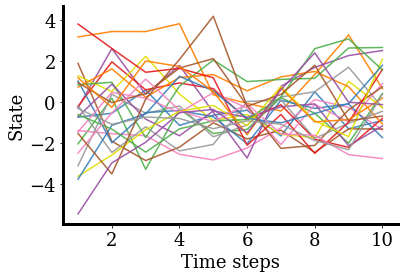

In [2]:
system = create_default_system(dim=default_values['dim'], seq_length = default_values['sequence_length'], stationary=False, spec_radius=1.0)
plot_system(system, default_values['sequence_length'])
if save_figures: plt.savefig(os.path.join(save_folder, 'stable.pdf'), bbox_inches='tight')

## Unstable system (spectral radius = 2.0)

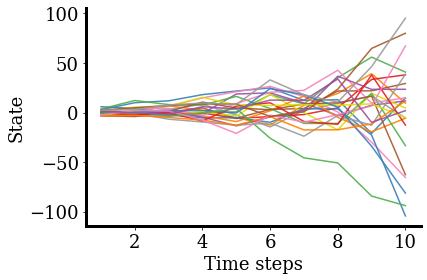

In [3]:
system = create_default_system(dim=default_values['dim'], seq_length = default_values['sequence_length'], stationary=False, spec_radius=2.0)
plot_system(system, default_values['sequence_length'])
if save_figures: plt.savefig(os.path.join(save_folder, 'unstable.pdf'), bbox_inches='tight')

## Dampening system (spectral radius = 0.2)

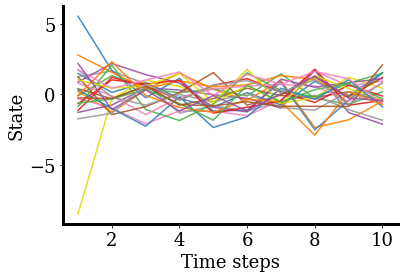

In [4]:
system = create_default_system(dim=default_values['dim'], seq_length = default_values['sequence_length'], stationary=False, spec_radius=0.2)
plot_system(system, default_values['sequence_length'])
if save_figures: plt.savefig(os.path.join(save_folder, 'dampening.pdf'), bbox_inches='tight')

# Validation of theory

### Varying training samples

In [5]:
n_list = list(range(100, 1500, 100))
nSamples_PR, nSamples_TE, nSamples_args = run_experiment(n_list, 'num_samples', create_default_system)

100%|██████████| 14/14 [21:07<00:00, 90.55s/it] 


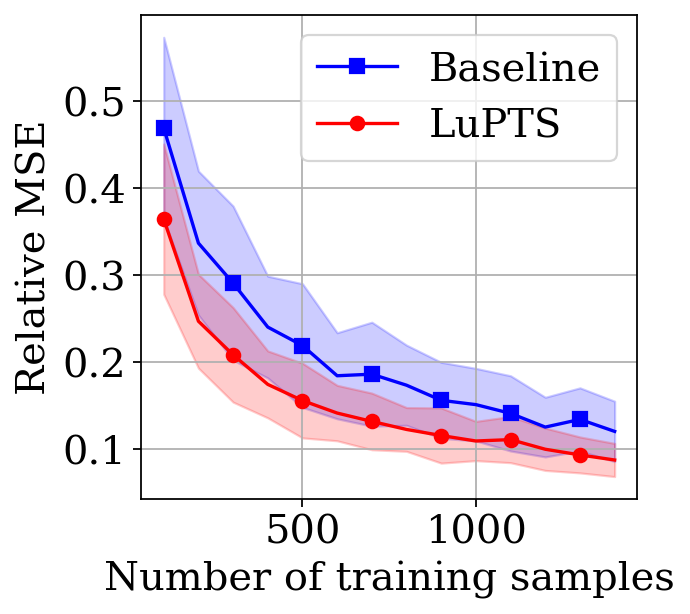

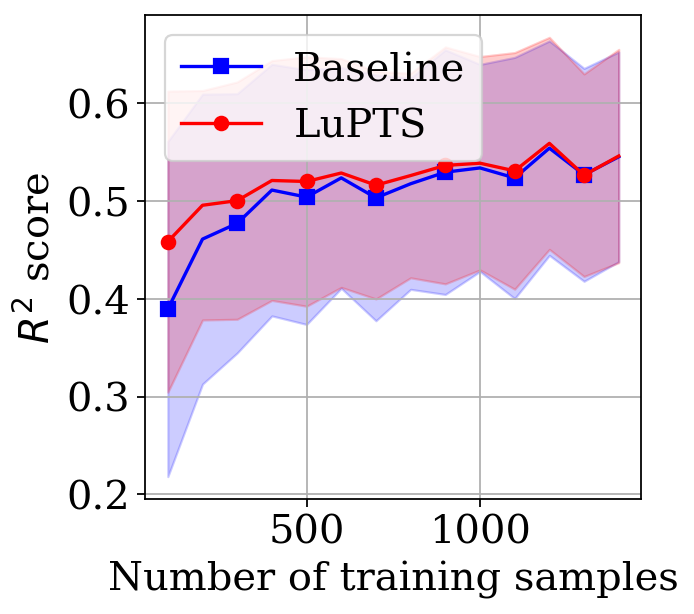

In [6]:
plot_results(nSamples_PR, nSamples_args, save=save_figures)
plot_results(nSamples_TE, nSamples_args, save=save_figures)

#### Varying sequnce length

In [23]:
sequence_length_list =  [2] + list(range(5, 20, 5))
seqLength_PR, seqLength_TE, seqLength_args = run_experiment(sequence_length_list, 'sequence_length', create_default_system)

100%|██████████| 4/4 [07:34<00:00, 113.66s/it]


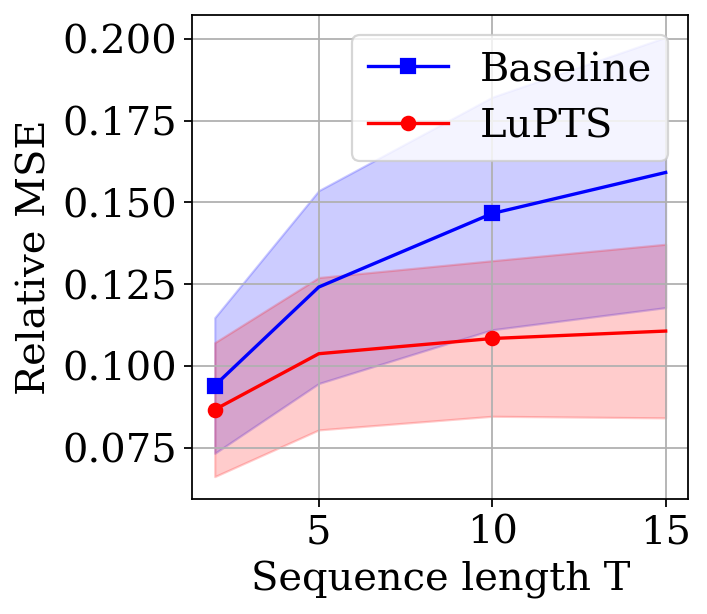

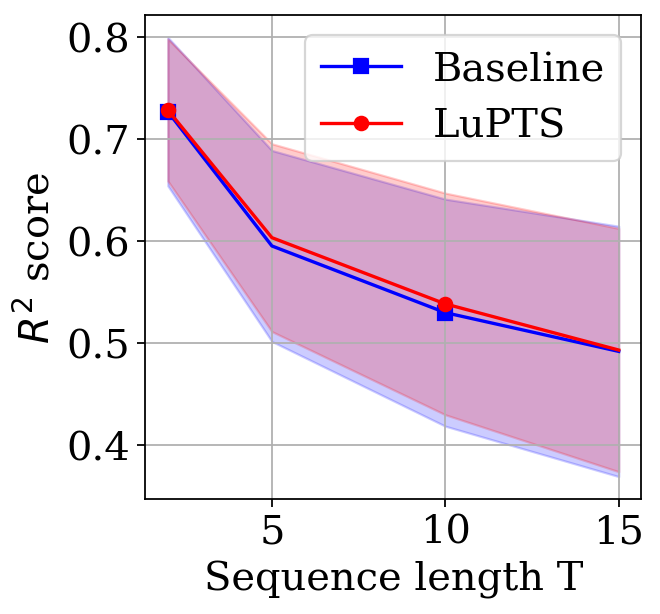

In [24]:
plot_results(seqLength_PR, seqLength_args, save=save_figures)
plot_results(seqLength_TE, seqLength_args, save=save_figures)

### Varying system noise variance

In [25]:
noise_var_list = [i/100 for i in range(0,125,25)]
noise_PR, noise_TE, noise_args = run_experiment(noise_var_list, 'noise_var', create_default_system)

100%|██████████| 5/5 [11:08<00:00, 133.62s/it]


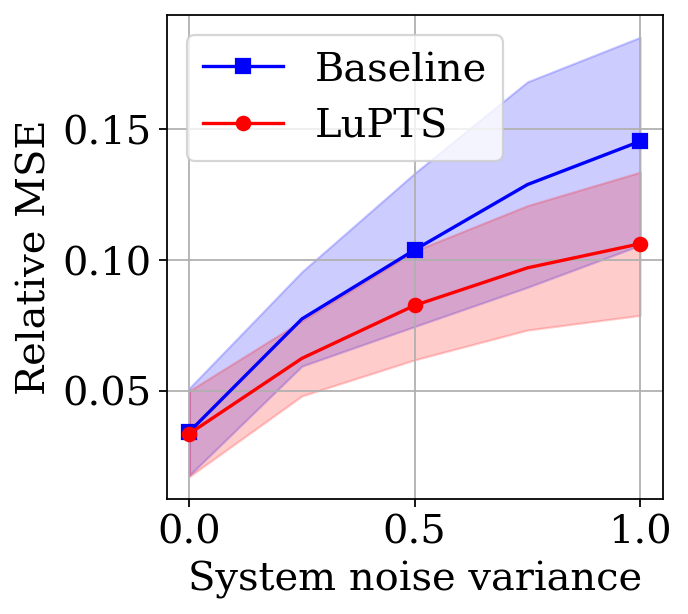

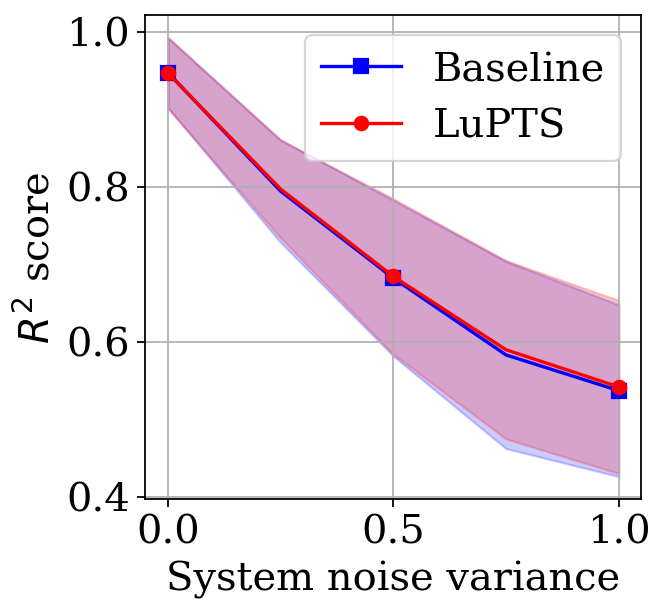

In [26]:
plot_results(noise_PR, noise_args, save=save_figures)
plot_results(noise_TE, noise_args, save=save_figures)

### Vary dimension

In [27]:
dim_list = list(range(5, 20, 5))
dim_PR, dim_TE, dim_args = run_experiment(dim_list, 'dim', create_default_system)

100%|██████████| 3/3 [06:51<00:00, 137.17s/it]


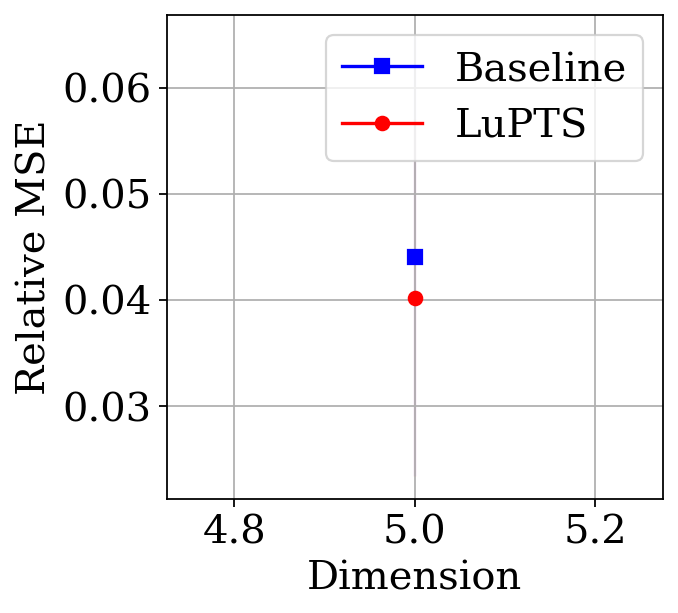

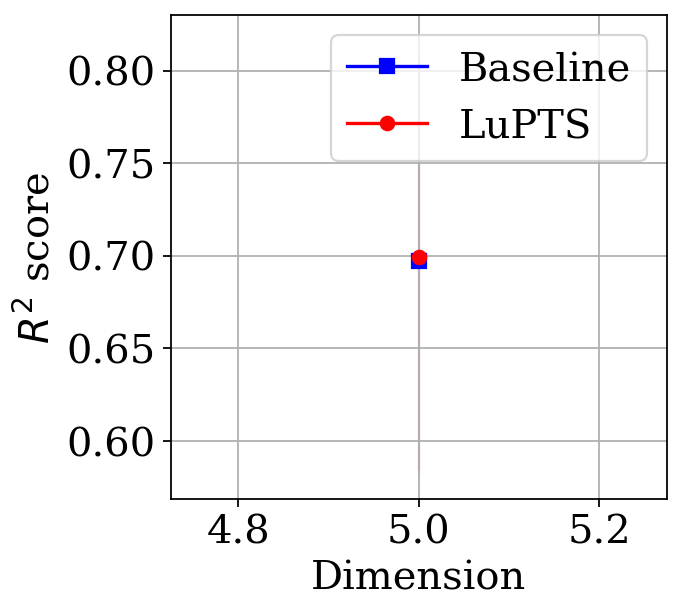

In [85]:
plot_results(dim_PR, dim_args, save=save_figures)
plot_results(dim_TE, dim_args, save=save_figures)

# Break Markov assumption
Note: beta2 in the code is delta from the paper. We vary the ratio by generating a another beta and multiply it with a scaling factor which we vary.

In [29]:
beta2_list = [i/10 for i in range(0, 15, 1)]
beta2_PR, beta2_TE, beta2_args = run_experiment(beta2_list, 'beta2', create_default_system)

  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
plot_results(beta2_PR, beta2_args, save=save_figures)
plot_results(beta2_TE, beta2_args, save=save_figures)

# Breaking the stationary assumption: Testing Stat-LuPTS with and without the staitonary assumption
- 1st figure shows for non-stationary  system
- 2nd figure shows for stationary  system

In [92]:
n_list = n_list # use same n_list as when varying over n_samples
stat_nSamples_PR, stat_nSamples_TE, stat_nSamples_args = run_experiment(n_list, 'num_samples', create_default_system, stationary=True)

100%|██████████| 4/4 [03:03<00:00, 45.99s/it]


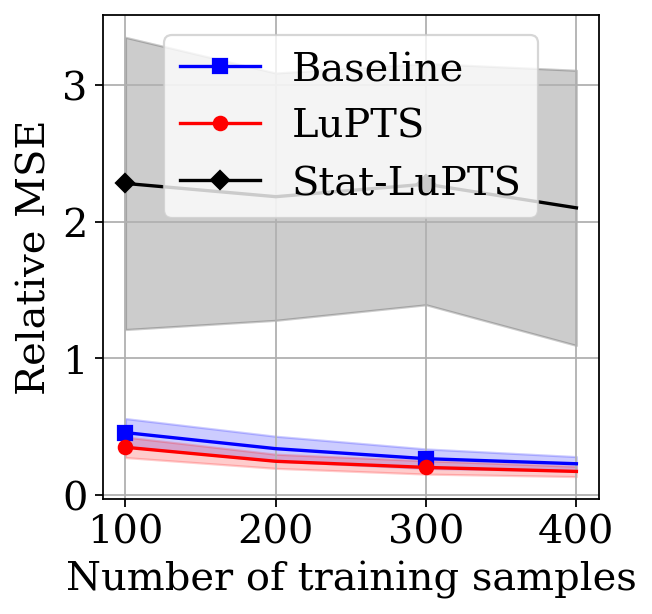

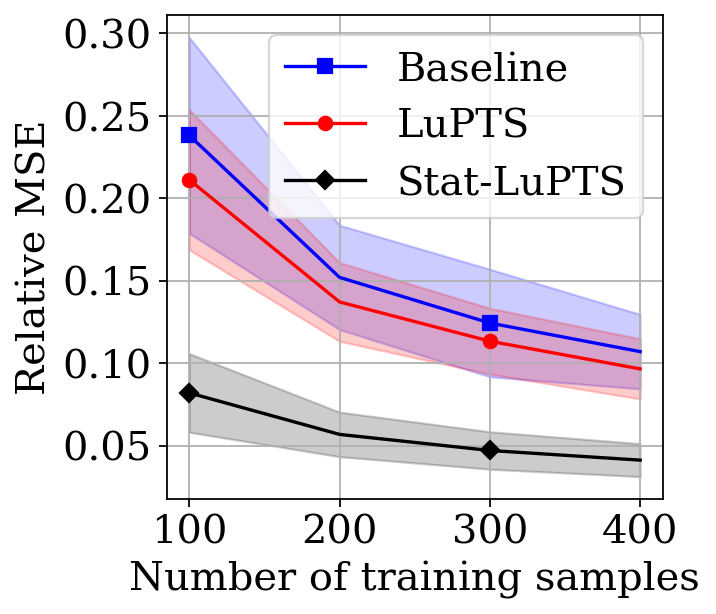

In [93]:
plot_results(nSamples_PR, nSamples_args, exclude_stat=False, save=save_figures) # results from when varying over samples (system was non-stationary, but now we also plot Stat-LUPTS)
plot_results(stat_nSamples_PR, nSamples_args, exclude_stat=False, save=save_figures) # results from staionary system

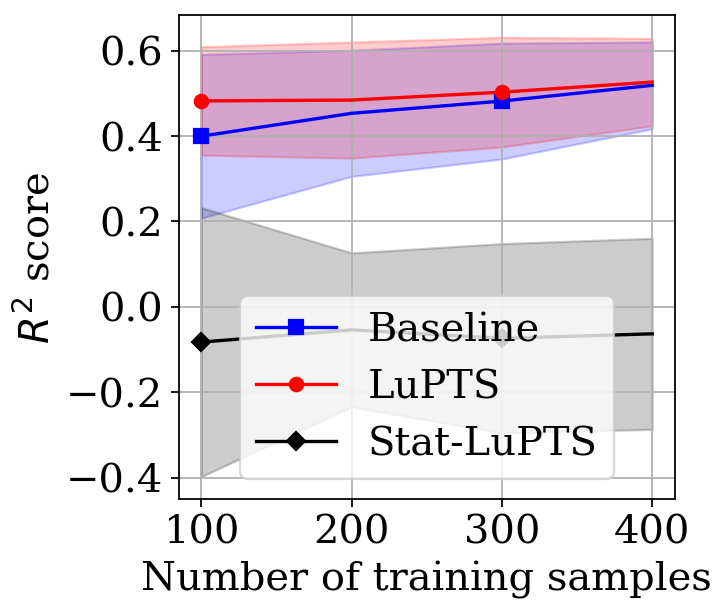

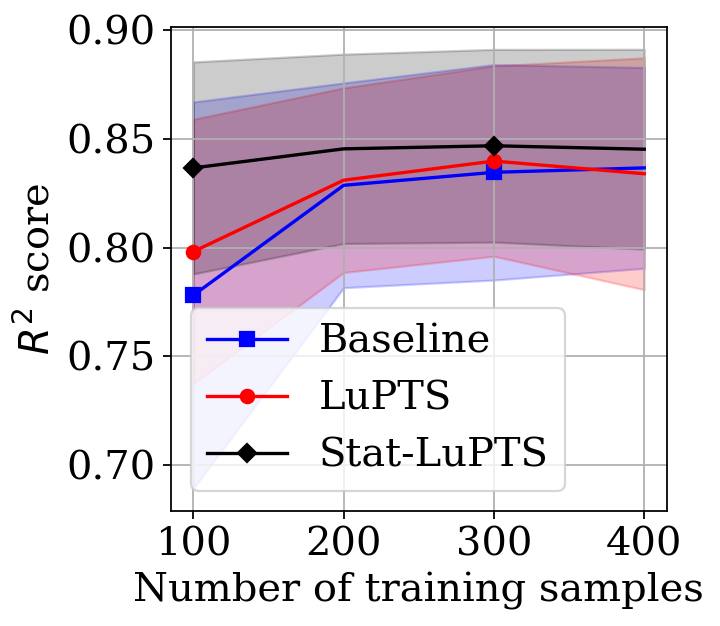

In [94]:
plot_results(nSamples_TE, nSamples_args, exclude_stat=False, save=save_figures) # results from when varying over samples (system was non-stationary, but now we also plot Stat-LUPTS)
plot_results(stat_nSamples_TE, nSamples_args, exclude_stat=False, save=save_figures) # results from staionary system

# Additional experiment: How does performance vary with spectral radius?

In [ ]:
spec_radius_list = [0.1*i for i in range(5,15,1)]
spectral_PR, spectral_TE, spectral_args = run_experiment(spec_radius_list, 'spec_radius', create_default_system)

In [ ]:
plot_results(spectral_PR, spectral_args, save=save_figures)
plot_results(spectral_TE, spectral_args, save=save_figures)